<a href="https://colab.research.google.com/github/pras-4795/JPMCColab/blob/main/Group_Work_(29_08)_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
mushrooms = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
y = (mushrooms.iloc[:,0])
X = (mushrooms.iloc[:,1:])

In [ ]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [ ]:
# Instantiate the LabelEncoder
le = LabelEncoder()
# Fit and transform the binary column
y = le.fit_transform(y)
# Print the mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'e': 0, 'p': 1}


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def ohe(df, col):
    le = LabelEncoder()
    a = le.fit_transform(df[col]).reshape(-1, 1)
    columns = [ f'{col}_{name}' for name in le.classes_ ]
    encoder = OneHotEncoder(sparse=False, categories='auto')
    result = pd.DataFrame(encoder.fit_transform(a), columns=columns)
    return result

In [ ]:
encoder = OneHotEncoder(sparse=False, categories='auto')
Xo = pd.DataFrame(encoder.fit_transform(X))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
Xo.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
from sklearn import neighbors, datasets, model_selection

# hyperparameter grid
{
    'criterion': ['gini', 'entropy'],
    'max_features': [2, 4, 6, 8, 10, 12, 14]
}


{'criterion': ['gini', 'entropy'], 'max_features': [2, 4, 6, 8, 10, 12, 14]}

In [ ]:
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=100)

In [ ]:
rfc.fit(Xo,y)


RandomForestClassifier(random_state=100)

In [ ]:
max_features = Xo.shape[1]

In [ ]:
from scipy import stats
# we would like to smaple from criterion and max_features as discrete uniform distributions
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_features': stats.randint(low=1, high=max_features),

}
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': [2, 4, 6, 8, 10, 12, 14]
}

In [ ]:
from sklearn import model_selection
# setting up the random search sampling 50 times and conducting 5-fold cross-validation
rscv = model_selection.RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy' , random_state=100)

In [ ]:
cv_spec = model_selection.GridSearchCV(estimator=rfc, param_grid=param_dist, scoring='accuracy', cv=10)

In [ ]:
cv_spec.fit(Xo,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [2, 4, 6, 8, 10, 12, 14]},
             scoring='accuracy')

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rscv.fit(Xo,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d780bc409a0>},
                   random_state=100, scoring='accuracy')

                                          params  mean_test_score
25    {'criterion': 'gini', 'max_features': 106}         0.948276
6      {'criterion': 'gini', 'max_features': 99}         0.948276
29    {'criterion': 'gini', 'max_features': 111}         0.947045
10    {'criterion': 'gini', 'max_features': 108}         0.946798
41    {'criterion': 'gini', 'max_features': 105}         0.946798
15      {'criterion': 'gini', 'max_features': 5}         0.941029
46    {'criterion': 'gini', 'max_features': 107}         0.940887
49  {'criterion': 'entropy', 'max_features': 11}         0.940660
39     {'criterion': 'gini', 'max_features': 18}         0.936842
27     {'criterion': 'gini', 'max_features': 64}         0.935232


<Axes: ylabel='params'>

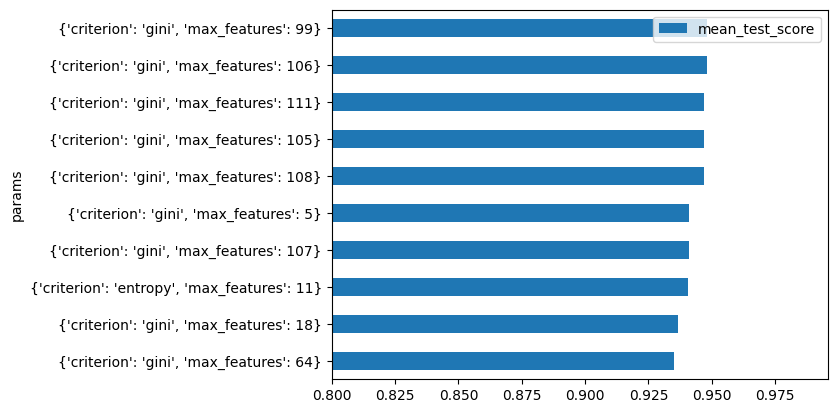

In [ ]:
# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(rscv.cv_results_)
# removing duplication
distinct_results = results.loc[:,['params','mean_test_score']]
# convert the params dictionaries to string data types
distinct_results.loc[:,'params'] = distinct_results.loc[:,'params'].astype('str')
# remove duplicates
distinct_results.drop_duplicates(inplace=True)
# look at the top 5 best hyperparamaterizations
sorted = distinct_results.sort_values('mean_test_score', ascending=False).head(10)
print(sorted)

# visualize the result
(
    sorted.loc[:,['params','mean_test_score']]
    .sort_values('mean_test_score', ascending=True)
    .plot.barh(x='params', xlim=(0.8))
)


                                          params  mean_test_score
3       {'criterion': 'gini', 'max_features': 8}         0.966911
10   {'criterion': 'entropy', 'max_features': 8}         0.966541
5      {'criterion': 'gini', 'max_features': 12}         0.966172
6      {'criterion': 'gini', 'max_features': 14}         0.966172
0       {'criterion': 'gini', 'max_features': 2}         0.966049
4      {'criterion': 'gini', 'max_features': 10}         0.965556
13  {'criterion': 'entropy', 'max_features': 14}         0.965310
7    {'criterion': 'entropy', 'max_features': 2}         0.965187
11  {'criterion': 'entropy', 'max_features': 10}         0.965187
1       {'criterion': 'gini', 'max_features': 4}         0.964940


<Axes: ylabel='params'>

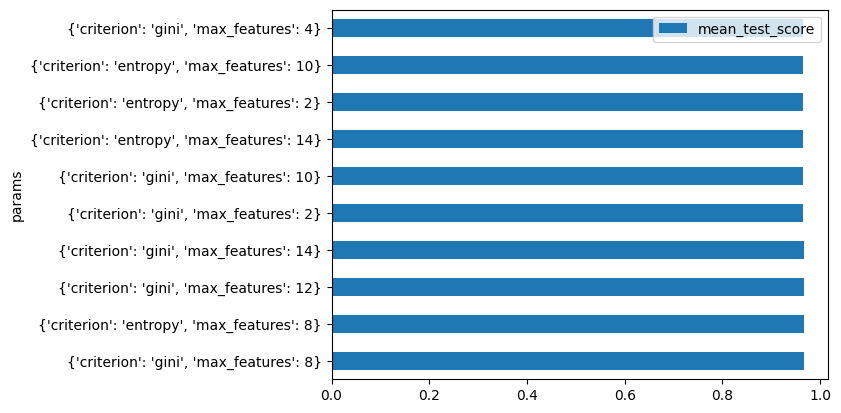

In [ ]:
#GRID SEARCH PERFORMANCE
import pandas as pd
# convert the results dictionary to a dataframe
results_grid = pd.DataFrame(cv_spec.cv_results_)
#
print(
results_grid.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=False).head(10)
)
# visualise the result
results_grid.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=False).head(10).plot.barh(x = 'params')

# Parameter Tuning

In [ ]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from scipy import stats
# we would like to smaple from criterion and max_features as discrete uniform distributions
param_dist_1 = {
    'criterion': ['gini', 'entropy'],
    'max_features': stats.randint(low=1, high=max_features),
    'n_estimators': [300,100,500,800]

}


In [ ]:
from sklearn import model_selection
# setting up the random search sampling 50 times and conducting 5-fold cross-validation
rscv_1 = model_selection.RandomizedSearchCV(estimator=rfc, param_distributions=param_dist_1, n_iter=50, cv=5, scoring='accuracy' , random_state=100)

In [ ]:
rscv_1.fit(Xo,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d78078c0fa0>,
                                        'n_estimators': [300, 100, 500, 800]},
                   random_state=100, scoring='accuracy')

                                               params  mean_test_score
3   {'criterion': 'gini', 'max_features': 99, 'n_e...         0.948276
34  {'criterion': 'gini', 'max_features': 88, 'n_e...         0.947907
40  {'criterion': 'gini', 'max_features': 96, 'n_e...         0.947537
4   {'criterion': 'gini', 'max_features': 99, 'n_e...         0.947045
42  {'criterion': 'gini', 'max_features': 103, 'n_...         0.945321
5   {'criterion': 'gini', 'max_features': 114, 'n_...         0.937931
27  {'criterion': 'gini', 'max_features': 18, 'n_e...         0.936842
19  {'criterion': 'gini', 'max_features': 64, 'n_e...         0.935232
11  {'criterion': 'entropy', 'max_features': 14, '...         0.932778
46  {'criterion': 'gini', 'max_features': 69, 'n_e...         0.932646


<Axes: ylabel='params'>

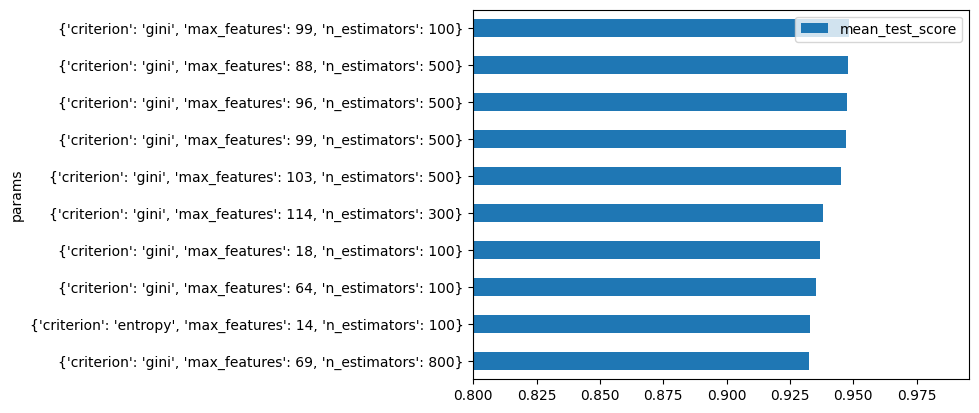

In [ ]:
# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(rscv_1.cv_results_)
# removing duplication
distinct_results_1 = results.loc[:,['params','mean_test_score']]
# convert the params dictionaries to string data types
distinct_results_1.loc[:,'params'] = distinct_results_1.loc[:,'params'].astype('str')
# remove duplicates
distinct_results_1.drop_duplicates(inplace=True)
# look at the top 5 best hyperparamaterizations
sorted = distinct_results_1.sort_values('mean_test_score', ascending=False).head(10)
print(sorted)

# visualize the result
(
    sorted.loc[:,['params','mean_test_score']]
    .sort_values('mean_test_score', ascending=True)
    .plot.barh(x='params', xlim=(0.8))
)
